### Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Clone repository

In [7]:
import os
import matplotlib.pyplot as plt
import shutil
!git clone https://github.com/agustinroviraquezada/MRI_T1_T2_CycleGAN.git
requirements= "/content/MRI_T1_T2_CycleGAN/requirements.txt"
!pip install -r $requirements -q

fatal: destination path 'MRI_T1_T2_CycleGAN' already exists and is not an empty directory.
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done


### Import package

In [3]:
import matplotlib.pyplot as plt
import torch
import numpy

### Parameters help

In [4]:
!python /content/MRI_T1_T2_CycleGAN/cycle/Test.py --help

usage: Test.py
       [-h]
       --input
       INPUT
       --model
       MODEL
       --Modality
       MODALITY
       [--HDBET HDBET]
       [--filters FILTERS]
       [--dim DIM]
       [--crop CROP]
       [--operation OPERATION]
       [--BlackProportion BLACKPROPORTION]

Pipeline de
procesamien
to

options:
  -h, --help
    show this
    help
    message and
    exit
  --input INPUT
    Input file
    path. File
    must be a
    .nii or
    tensor 128
    x 128
  --model MODEL
    Path to the
    model
  --Modality MODALITY
    Input
    Modality
  --HDBET HDBET
    Apply HDBET
    only for
    .nii
  --filters FILTERS
    Apply image
    selection
    based on
    the black
    pixel
    proportion
  --dim DIM
    Dimention
    where to
    iterate.
    For .nii
    where is
    the
    dimention
    to iterate
  --crop CROP
    Apply
    centering
    crop
  --operation OPERATION
    Apply Image
    normalizati
    on
  --BlackProportion BLACKPROPORTION
    Black Pixel
   

### Model Apply: NIfTY and no HDBET processing , T1-->T2

You just have loaded a input file of (240, 240, 155)
Slice [77, 78, 79, 80, 81, 82, 83, 84, 85] has been selected


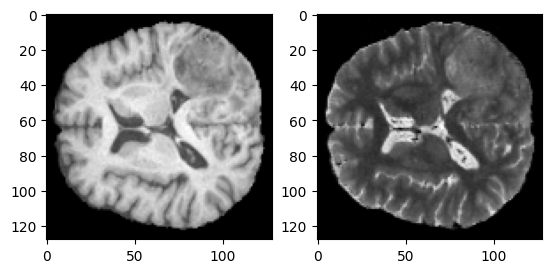

In [5]:
input="/content/MRI_T1_T2_CycleGAN/Examples/BraTS20_Validation_007_t1.nii"
model="/content/MRI_T1_T2_CycleGAN/Models/Optimized_model_0.690-290.ckpt"
!python /content/MRI_T1_T2_CycleGAN/cycle/Test.py --input $input --model $model --Modality "T1" --filters 1 --dim 2 --BlackProportion 0.7

fig, axs = plt.subplots(1, 2)
T1=torch.squeeze(torch.load("/content/MRI_T1_T2_CycleGAN/Examples/Original/B_84.pt").to('cpu')).numpy()
T2=torch.squeeze(torch.load("/content/MRI_T1_T2_CycleGAN/Examples/Synthetic/s_B_84.pt").to('cpu')).numpy()
axs[0].imshow(T1,cmap="gray")
axs[1].imshow(T2,cmap="gray")
plt.show()

### Model Apply: NIfTY and  HDBET processing , T1-->T2

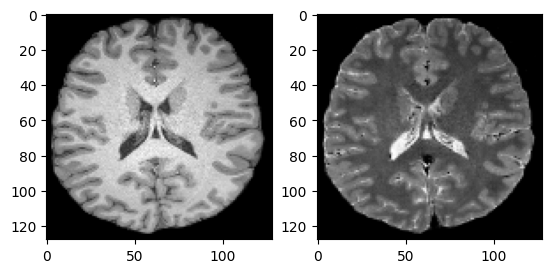

In [11]:
shutil.rmtree("/content/MRI_T1_T2_CycleGAN/Examples/Original")
shutil.rmtree("/content/MRI_T1_T2_CycleGAN/Examples/Synthetic")

input="/content/MRI_T1_T2_CycleGAN/Examples/sub-01_T1w.nii.gz"
model="/content/MRI_T1_T2_CycleGAN/Models/Optimized_model_0.690-290.ckpt"
!python /content/MRI_T1_T2_CycleGAN/cycle/Test.py --input $input --model $model --Modality "T1" --HDBET True --filters 1 --dim 1 --BlackProportion 0.6

fig, axs = plt.subplots(1, 2)
T1=torch.squeeze(torch.load("/content/MRI_T1_T2_CycleGAN/Examples/Original/B_206.pt").to('cpu')).numpy()
T2=torch.squeeze(torch.load("/content/MRI_T1_T2_CycleGAN/Examples/Synthetic/s_B_206.pt").to('cpu')).numpy()
axs[0].imshow(T1,cmap="gray")
axs[1].imshow(T2,cmap="gray")
plt.show()

### Model Apply: NIfTY and HDBET processing, T2-->T1

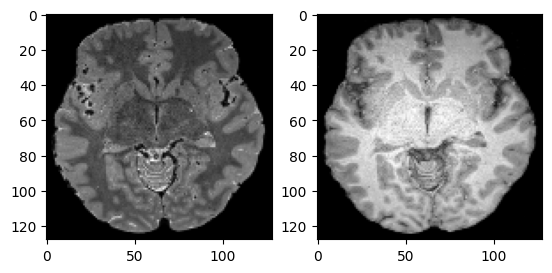

In [14]:
shutil.rmtree("/content/MRI_T1_T2_CycleGAN/Examples/Original")
shutil.rmtree("/content/MRI_T1_T2_CycleGAN/Examples/Synthetic")


input="/content/MRI_T1_T2_CycleGAN/Examples/sub-01_T2w.nii.gz"
model="/content/MRI_T1_T2_CycleGAN/Models/Optimized_model_0.690-290.ckpt"
!python /content/MRI_T1_T2_CycleGAN/cycle/Test.py --input $input --model $model --Modality "T2" --HDBET True --filters 1 --dim 1 --BlackProportion 0.6

fig, axs = plt.subplots(1, 2)
T2=torch.squeeze(torch.load("/content/MRI_T1_T2_CycleGAN/Examples/Original/B_174.pt").to('cpu')).numpy()
T1=torch.squeeze(torch.load("/content/MRI_T1_T2_CycleGAN/Examples/Synthetic/s_B_174.pt").to('cpu')).numpy()
axs[0].imshow(T2,cmap="gray")
axs[1].imshow(T1,cmap="gray")
plt.show()

### Model apply: NIfTY and no HDBET, no slice selection, T1 --> T2

You just have loaded a input file of (240, 240, 155)
/content/drive/MyDrive/Test.py:73: RuntimeWarning: invalid value encountered in true_divide
  images_scaled = img / np.max(img, axis=(1, 2))[:, np.newaxis, np.newaxis]
/content/MRI_T1_T2_CycleGAN/Examples


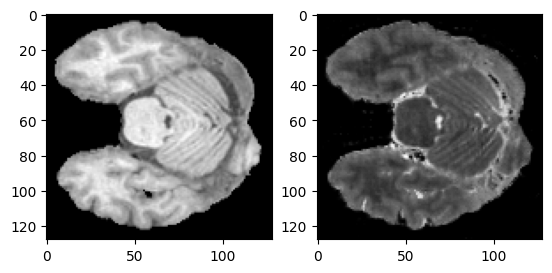

In [37]:
shutil.rmtree("/content/MRI_T1_T2_CycleGAN/Examples/Original")
shutil.rmtree("/content/MRI_T1_T2_CycleGAN/Examples/Synthetic")

input="/content/MRI_T1_T2_CycleGAN/Examples/BraTS20_Validation_007_t1.nii"
model="/content/MRI_T1_T2_CycleGAN/Models/Optimized_model_0.690-290.ckpt"
!python /content/MRI_T1_T2_CycleGAN/cycle/Test.py --input $input --model $model --Modality "T1" --filters 0  --dim 2 --BlackProportion 0.7

fig, axs = plt.subplots(1, 2)
T1=torch.squeeze(torch.load("/content/MRI_T1_T2_CycleGAN/Examples/Original/B_48.pt").to('cpu')).numpy()
T2=torch.squeeze(torch.load("/content/MRI_T1_T2_CycleGAN/Examples/Synthetic/s_B_48.pt").to('cpu')).numpy()
axs[0].imshow(T1,cmap="gray")
axs[1].imshow(T2,cmap="gray")
plt.show()

### Model apply: Tensor Slice, no preprocessing.  T1 --> T2

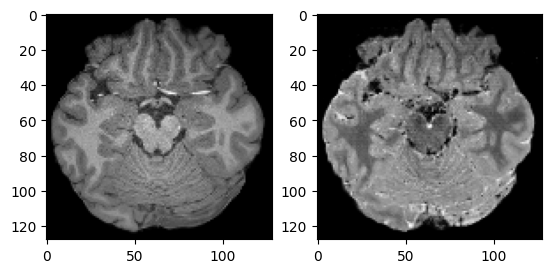

In [42]:
input="/content/MRI_T1_T2_CycleGAN/Examples/ds002330_001_159_T1w.pt"
model="/content/MRI_T1_T2_CycleGAN/Models/Optimized_model_0.690-290.ckpt"
!python /content/MRI_T1_T2_CycleGAN/cycle/Test.py --input $input --model $model --Modality "T1"


fig, axs = plt.subplots(1, 2)
T1=torch.squeeze(torch.load("/content/MRI_T1_T2_CycleGAN/Examples/Original/ds002330_001_159_T1w.pt").to('cpu')).numpy()
T2=torch.squeeze(torch.load("/content/MRI_T1_T2_CycleGAN/Examples/Synthetic/ds002330_001_159_T1w.pt").to('cpu')).numpy()
axs[0].imshow(T1,cmap="gray")
axs[1].imshow(T2,cmap="gray")
plt.show()

### Model apply: Tensor Slice.  T2 --> T1

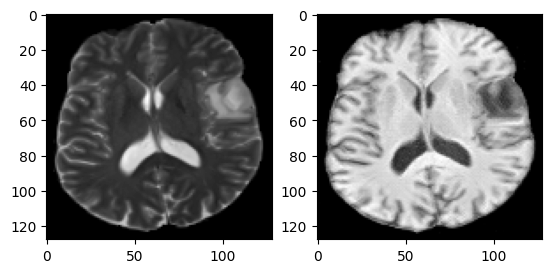

In [45]:
input="/content/MRI_T1_T2_CycleGAN/Examples/B_002_70_T2W.pt"
model="/content/MRI_T1_T2_CycleGAN/Models/Optimized_model_0.690-290.ckpt"
!python /content/MRI_T1_T2_CycleGAN/cycle/Test.py --input $input --model $model --Modality "T2"


fig, axs = plt.subplots(1, 2)
T1=torch.squeeze(torch.load("/content/MRI_T1_T2_CycleGAN/Examples/Original/B_002_70_T2W.pt").to('cpu')).numpy()
T2=torch.squeeze(torch.load("/content/MRI_T1_T2_CycleGAN/Examples/Synthetic/B_002_70_T2W.pt").to('cpu')).numpy()
axs[0].imshow(T1,cmap="gray")
axs[1].imshow(T2,cmap="gray")
plt.show()